In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

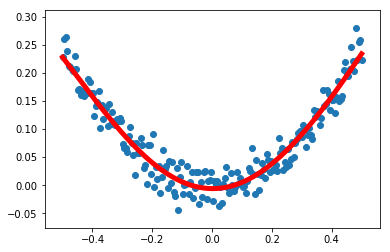

In [9]:
#使用numpy生成200个随机点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]#后面增加一个维度，形成200行，1列
noise=np.random.normal(0,0.02,x_data.shape)#生成随机值，形状和x_data一样
y_data=np.square(x_data)+noise


#定义两个placehoder
x=tf.placeholder(tf.float32,[None,1])#后面【】是形状
y=tf.placeholder(tf.float32,[None,1])

#定义神经网络的中间层
Weights_L1=tf.Variable(tf.random_normal([1,10]))#一行十列,中间层有10个神经元
biases_L1=tf.Variable(tf.zeros([1,10]))#偏置值
Wx_plus_b_L1=tf.matmul(x,Weights_L1)+biases_L1#信号总和
L1=tf.nn.tanh(Wx_plus_b_L1)#中间层输出


#定义神经网络输出层
Weights_L2=tf.Variable(tf.random_normal([10,1]))#输出层有一个神经元
biases_L2=tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2=tf.matmul(L1,Weights_L2)+biases_L2
prediction=tf.nn.tanh(Wx_plus_b_L2)#预测结果

#二次代价函数
loss=tf.reduce_mean(tf.square(y-prediction))

#梯度下降法
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})#优化过程中，变量会改变
    
    #获得预测值
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)#散点图
    plt.plot(x_data,prediction_value,'r-',lw=5)#'r-'中，r代表红色，-代表实线，lw代表线宽
    plt.show()


